# Machine Learning Project - IA mention CentraleSupélec

Under the supervision of :

- Myriam TAMI

Students:

- Lucas Tramonte

# Libraries


In [105]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, SelectKBest, RFECV


# EDA

In [3]:
data_original = pd.read_csv('Assets/Data/welddb.data', delimiter='\s+', header=None)

In [83]:
data = data_original.copy()

# Name the columns
data.columns = [
    'Carbon concentration (weight%)', 
    'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 
    'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 
    'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 
    'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 
    'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 
    'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm by weight)', 
    'Titanium concentration (ppm by weight)', 
    'Nitrogen concentration (ppm by weight)', 
    'Aluminium concentration (ppm by weight)', 
    'Boron concentration (ppm by weight)', 
    'Niobium concentration (ppm by weight)', 
    'Tin concentration (ppm by weight)', 
    'Arsenic concentration (ppm by weight)', 
    'Antimony concentration (ppm by weight)', 
    'Current (A)', 
    'Voltage (V)', 
    'AC or DC', 
    'Electrode positive or negative', 
    'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 
    'Type of weld', 
    'Post weld heat treatment temperature (°C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 
    'Reduction of Area (%)', 
    'Charpy temperature (°C)', 
    'Charpy impact toughness (J)', 
    'Hardness (kg/mm2)', 
    '50% FATT', 
    'Primary ferrite in microstructure (%)', 
    'Ferrite with second phase (%)', 
    'Acicular ferrite (%)', 
    'Martensite (%)', 
    'Ferrite with carbide aggregate (%)', 
    'Weld ID'
]

data

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


Percentage of 'N' values in each column

In [84]:
percent_n = (data == 'N').mean() * 100
percent_n_sorted = percent_n.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
percent_n_sorted

50% FATT                                     98.12%
Tungsten concentration (weight%)             95.46%
Ferrite with carbide aggregate (%)           94.61%
Martensite (%)                               94.61%
Ferrite with second phase (%)                94.55%
Acicular ferrite (%)                         94.55%
Primary ferrite in microstructure (%)        94.07%
Cobalt concentration (weight%)               92.19%
Hardness (kg/mm2)                            91.65%
Arsenic concentration (ppm by weight)        85.84%
Antimony concentration (ppm by weight)       84.26%
Tin concentration (ppm by weight)            82.08%
Boron concentration (ppm by weight)          69.49%
Copper concentration (weight%)               65.01%
Nickel concentration (weight%)               57.81%
Elongation (%)                               57.63%
Reduction of Area (%)                        57.32%
Ultimate tensile strength (MPa)              55.33%
Niobium concentration (ppm by weight)        54.48%
Yield streng

- The presence of an ``N'' indicates that the value was not reported in the publication. This is NOT meant to be an indication that the value is zero.

- It wouldn't make sense to set the phosphorus and sulfur concentrations to zero when their values aren't reported, because these impurity elements are inevitably present in welds in practice. Therefore, we'll use the average values for these concentrations in such cases. On the other hand, for other elements like manganese and nickel, it is reasonable to set their concentrations to zero if they are not reported. This is because they wouldn't be deliberate additions and their concentrations would be close to the detection limits of the commonly used analytical techniques [1].

In [85]:
# Replace 'N' with NaN
data.replace('N', pd.NA, inplace=True)

# Convert columns to numeric 
data_numeric = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')

mean_phosphorus = data_numeric['Phosphorus concentration (weight%)'].dropna().astype(float).mean()
mean_sulphur = data_numeric['Sulphur concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with aver
# age values for Phosphorus and Sulphur
data_numeric['Phosphorus concentration (weight%)'] = data_numeric['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
data_numeric['Sulphur concentration (weight%)'] = data_numeric['Sulphur concentration (weight%)'].fillna(mean_sulphur)

# Replace NaNs with 0 for the other columns
data_numeric.fillna(0, inplace=True)


In [86]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1652 non-null   float64
 4   Phosphorus concentration (weight%)         1652 non-null   float64
 5   Nickel concentration (weight%)             1652 non-null   float64
 6   Chromium concentration (weight%)           1652 non-null   float64
 7   Molybdenum concentration (weight%)         1652 non-null   float64
 8   Vanadium concentration (weight%)           1652 non-null   float64
 9   Copper concentration (weight%)             1652 non-null   float64
 10  Cobalt concentration (we

In [87]:
data_numeric.describe()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%)
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.175108,0.997214,0.230002,0.027188,0.060151,...,30.640981,-18.413438,46.657990,10.445521,-0.583535,1.136199,1.414044,2.878329,0.018160,0.023608
std,0.023898,0.112455,0.382137,0.011202,0.019567,0.550553,2.333634,0.408268,0.068649,0.207850,...,35.998470,30.661184,57.020296,46.630226,7.240754,5.254997,7.690437,13.175849,0.738102,0.337518
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-114.000000,0.000000,0.000000,-126.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.030000,0.402500,0.270000,0.010000,0.000000,...,73.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,83.000000,188.000000,270.000000,265.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000


In [88]:
# We also need to remove the Charpy temperature (°C) and 50% FATT features
print("------------Sum of negative values : ------------ \n ")
print(data_numeric[data_numeric < 0].sum())

------------Sum of negative values : ------------ 
 
Carbon concentration (weight%)                   0.0
Silicon concentration (weight%)                  0.0
Manganese concentration (weight%)                0.0
Sulphur concentration (weight%)                  0.0
Phosphorus concentration (weight%)               0.0
Nickel concentration (weight%)                   0.0
Chromium concentration (weight%)                 0.0
Molybdenum concentration (weight%)               0.0
Vanadium concentration (weight%)                 0.0
Copper concentration (weight%)                   0.0
Cobalt concentration (weight%)                   0.0
Tungsten concentration (weight%)                 0.0
Oxygen concentration (ppm by weight)             0.0
Titanium concentration (ppm by weight)           0.0
Nitrogen concentration (ppm by weight)           0.0
Aluminium concentration (ppm by weight)          0.0
Boron concentration (ppm by weight)              0.0
Niobium concentration (ppm by weight)         

In [89]:
#Duplicates
data_numeric[data_numeric.duplicated(keep= False)]

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%)
0,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.0000,0.00,...,80.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,80.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,80.6,-44.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.044,0.35,1.43,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,78.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.045,0.33,1.85,0.007,0.016,0.00,0.0,0.00,0.0000,0.00,...,76.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.0000,0.00,...,80.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,80.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,80.6,-44.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.044,0.35,1.43,0.007,0.014,0.00,0.0,0.00,0.0000,0.00,...,78.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,0.045,0.33,1.85,0.007,0.016,0.00,0.0,0.00,0.0000,0.00,...,76.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
data_numeric = data_numeric.drop_duplicates(keep='last')
data_numeric.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True)

array([[<Axes: title={'center': 'Carbon concentration (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration (weight%)'}>,
        <Axes: title={'center': 'Phosphorus concentration (weight%)'}>,
        <Axes: title={'center': 'Nickel concentration (weight%)'}>],
       [<Axes: title={'center': 'Chromium concentration (weight%)'}>,
        <Axes: title={'center': 'Molybdenum concentration (weight%)'}>,
        <Axes: title={'center': 'Vanadium concentration (weight%)'}>,
        <Axes: title={'center': 'Copper concentration (weight%)'}>,
        <Axes: title={'center': 'Cobalt concentration (weight%)'}>,
        <Axes: title={'center': 'Tungsten concentration (weight%)'}>],
       [<Axes: title={'center': 'Oxygen concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Titanium concentration (ppm by weight)'}>,
        <Axes

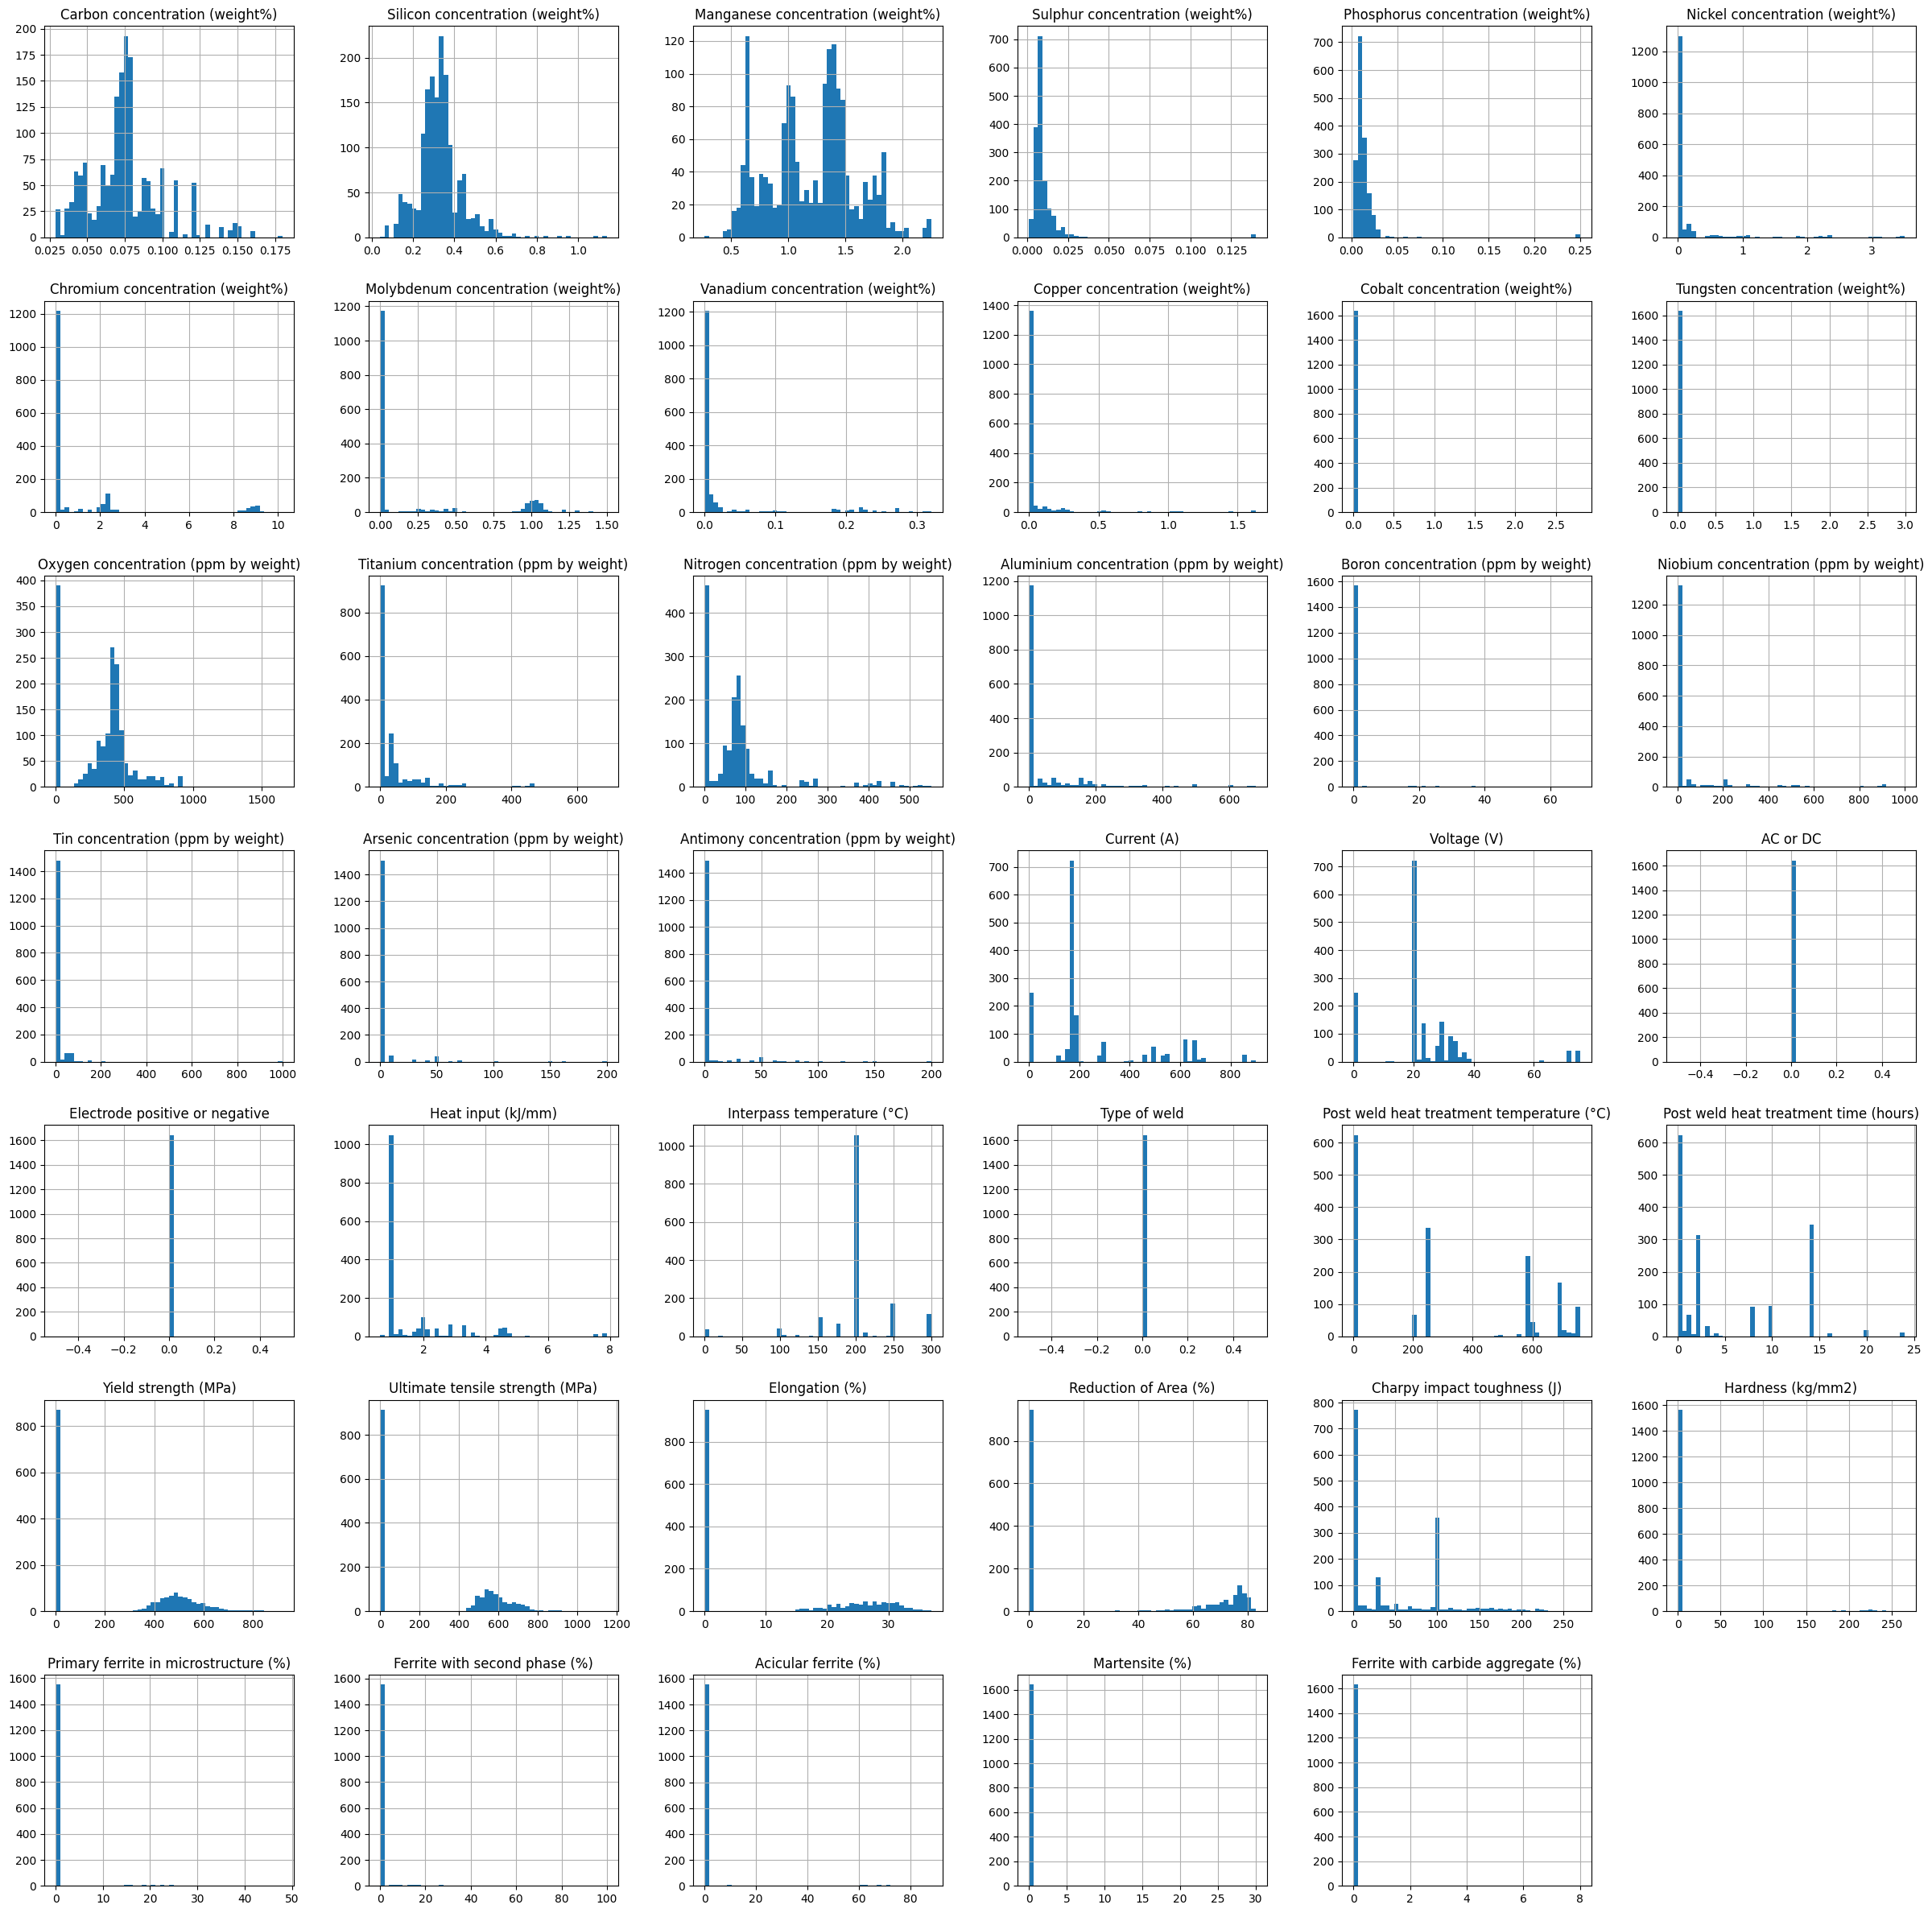

In [91]:
data_numeric.hist(bins = 50, figsize= (30,30))

# Analysis of Yield Strenght

### EDA

In [92]:
data_yield_strenght = data_numeric[[
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
    'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)',
    'Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
    'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)']]

summary_yield_strenght = pd.DataFrame({
    'Variable': data_yield_strenght.columns,
    'Min': [data_yield_strenght[col].min() for col in data_yield_strenght.columns],
    'Max': [data_yield_strenght[col].max() for col in data_yield_strenght.columns],
    'Mean': [data_yield_strenght[col].mean() for col in data_yield_strenght.columns],
    'Standard Deviation': [data_yield_strenght[col].std() for col in data_yield_strenght.columns]
})

summary_yield_strenght

,Variable,Min,Max,Mean,Standard Deviation
0,Carbon concentration (weight%),0.029,0.18,0.075627,0.023882
1,Silicon concentration (weight%),0.040,1.14,0.328661,0.112738
2,Manganese concentration (weight%),0.270,2.25,1.203268,0.382110
3,Sulphur concentration (weight%),0.001,0.14,0.009574,0.011231
4,Phosphorus concentration (weight%),0.002,0.25,0.012966,0.019617
5,Nickel concentration (weight%),0.000,3.50,0.176049,0.551912
6,Chromium concentration (weight%),0.000,10.20,1.001277,2.338761
7,Molybdenum concentration (weight%),0.000,1.50,0.230623,0.408569
8,Vanadium concentration (weight%),0.000,0.32,0.027336,0.068808
9,Copper concentration (weight%),0.000,1.63,0.060469,0.208374


c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


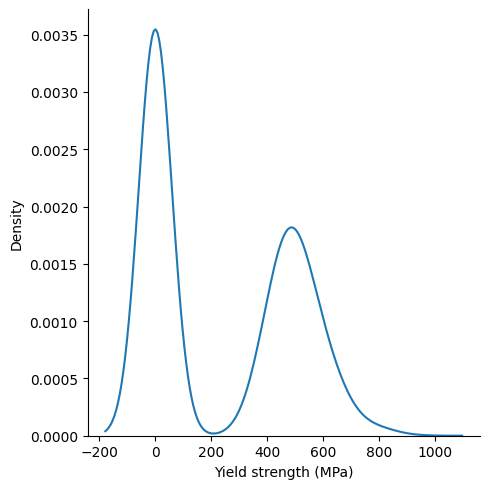

In [93]:
sns.displot(data = data_yield_strenght, x = "Yield strength (MPa)", kind = "kde")

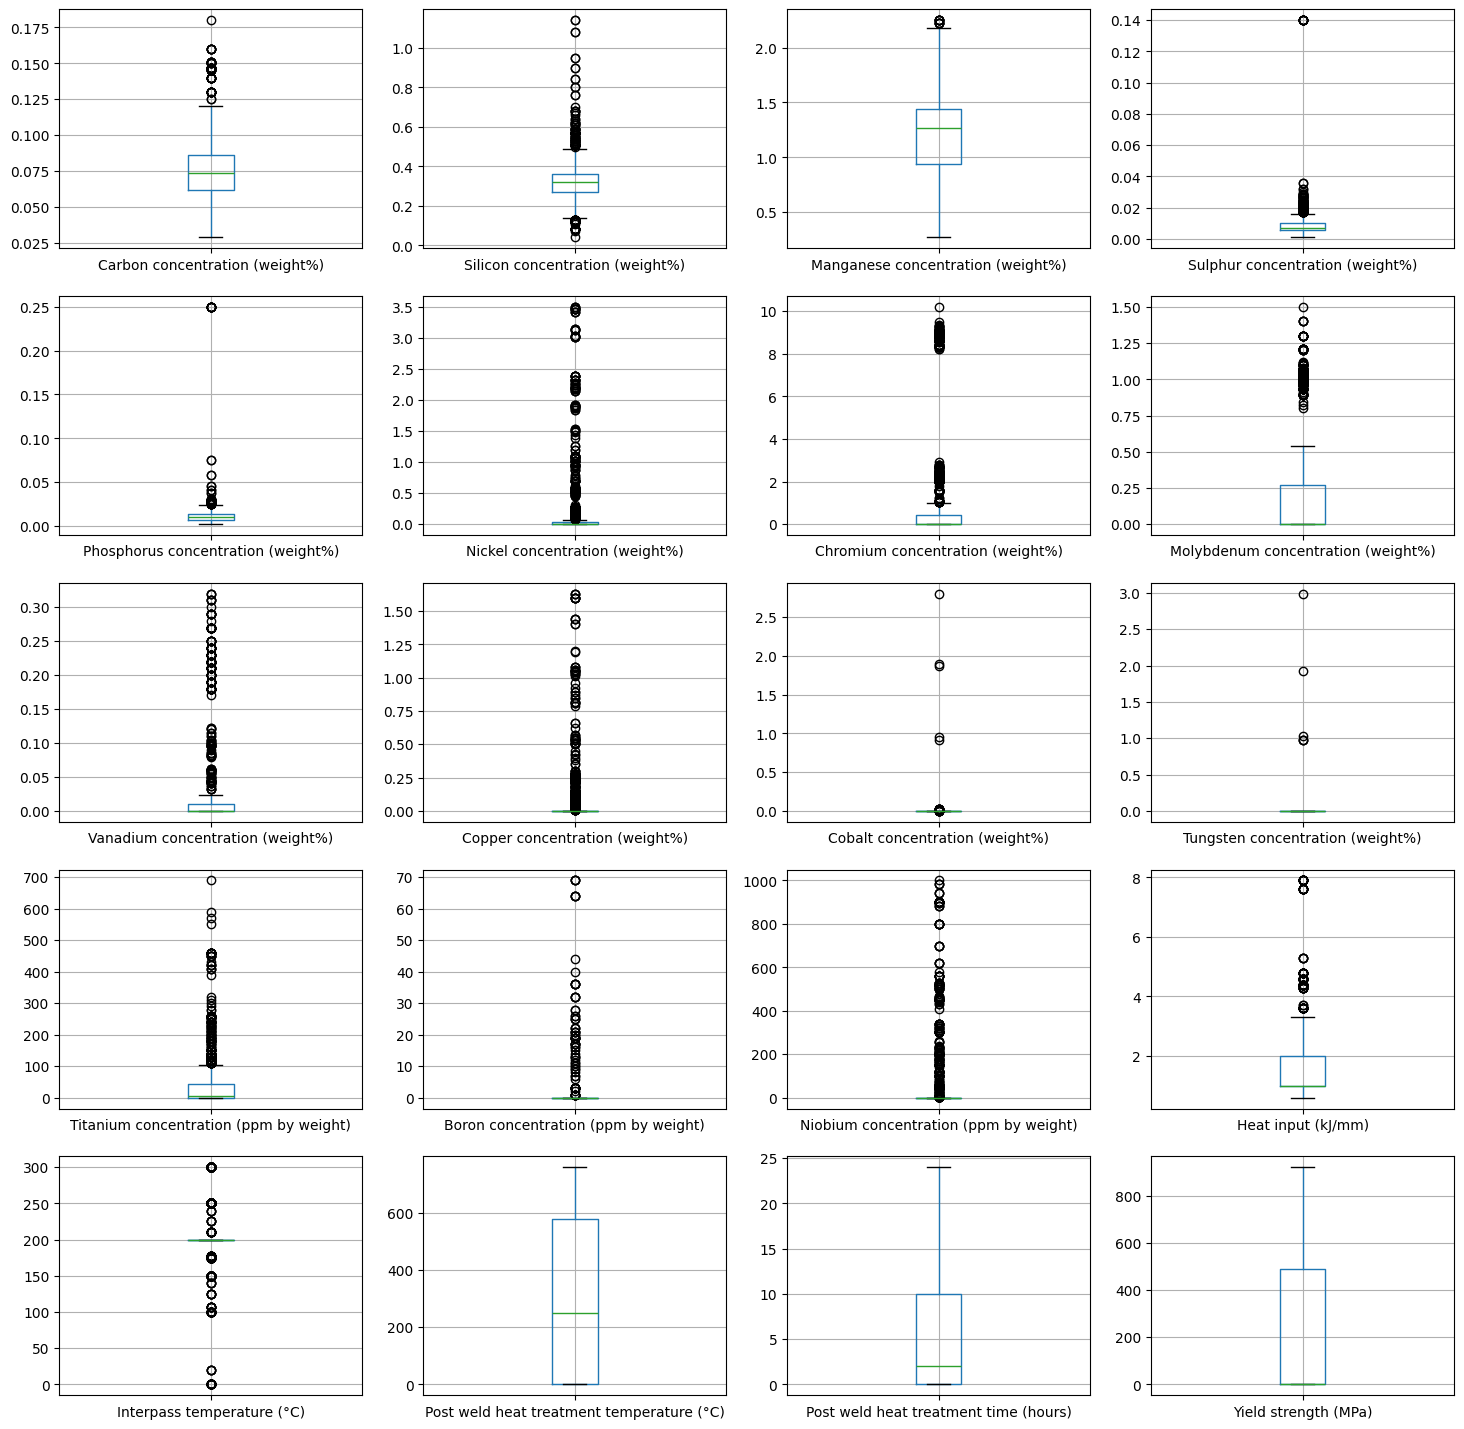

In [94]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_yield_strenght.columns):
    data_yield_strenght.boxplot(column = col, ax = ax)

<Axes: >

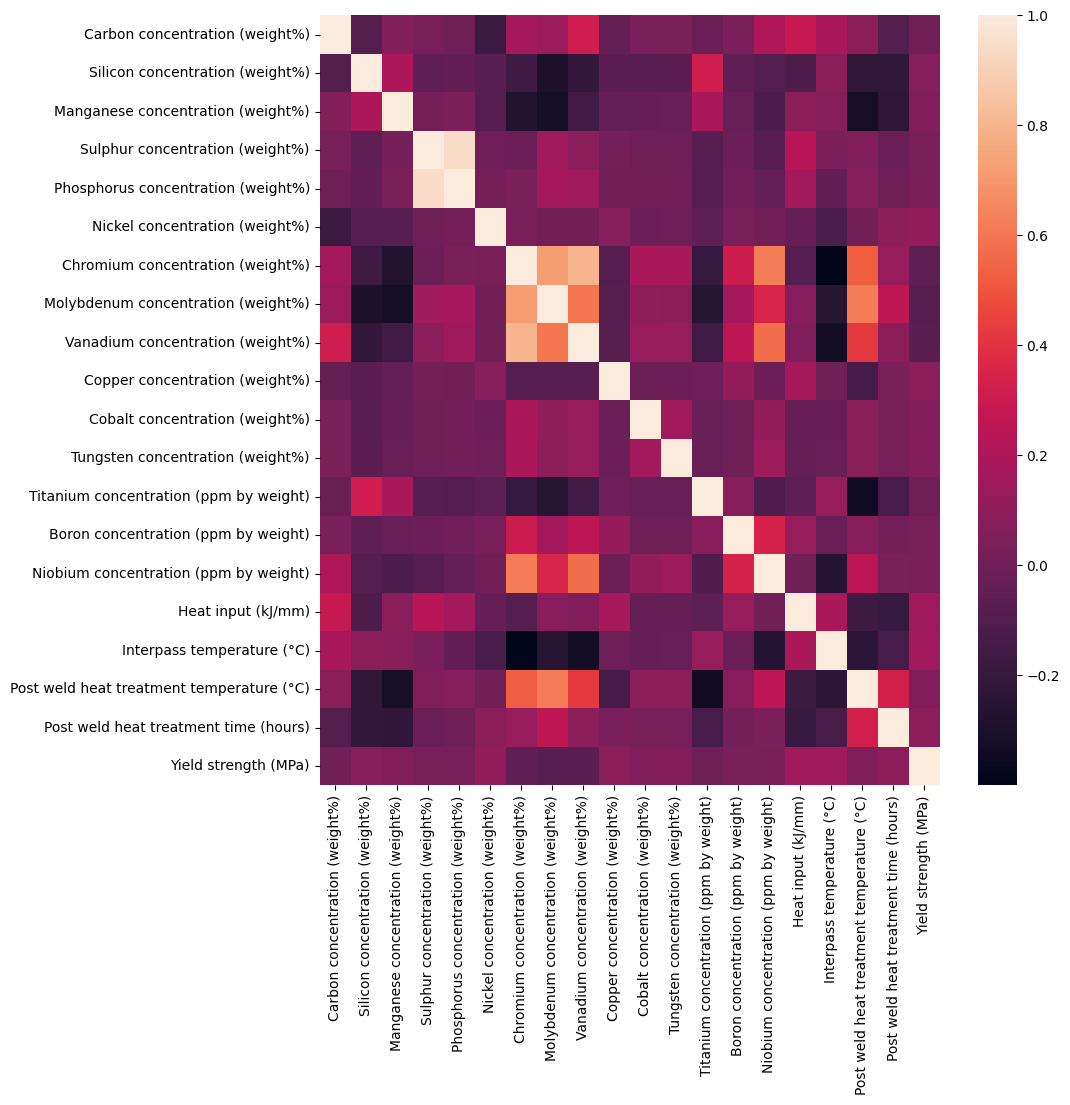

In [12]:
yield_strenght_corr = data_yield_strenght.corr()
plt.figure(figsize= (10,10))
sns.heatmap(yield_strenght_corr)

- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.

### Modeling - Regression

In [22]:
## Split the data into train and test

df_yield_strenght = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')

#Selecting only the features indicated in the literature considerably worsens the metrics. Therefore, it is more interesting to do a bivariate analysis later and select the most important features

#df_yield_strenght = df_yield_strenght[['Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)','Sulphur concentration (weight%)','Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)','Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 'Heat input (kJ/mm)', 'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)']]

X = df_yield_strenght.drop(columns = ["Yield strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_yield_strenght["Yield strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()
#mean_sulphur = X_train['Sulphur concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
#X_train['Sulphur concentration (weight%)'] = X_train['Sulphur concentration (weight%)'].fillna(mean_sulphur)

X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
#X_test['Sulphur concentration (weight%)'] = X_test['Sulphur concentration (weight%)'].fillna(mean_sulphur)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

#As the distributions do not follow a Gaussian pattern, we should use normalization instead of standardization. However, to use normalization, we must remove the outliers with IQR

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))


 -------------------- Linear Regression -------------------- 

MAPE LR : 0.7047818697567729
R2 LR : 0.7473207694451824
MSE LR : 14397.19532233726

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 0.7062449989031443
R2 Ridge : 0.7449739933651272
MSE Ridge : 14285.051272165301

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.7981990823070971
R2 Lasso : 0.6908829206841827
MSE Lasso : 16359.59735450008

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.8367855843970765
R2 ElasticNet : -2.628586438403027
MSE ElasticNet : 36459.69542393222

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 7381908260185914.0
R2 Decision Tree : 0.9793221420809367
MSE Decision Tree : 1469.7060483870966

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.09119661975054602
R2 RF : 0.9772434197080828
MSE RF : 1538.0354159173387

 -------------------- G

# Analysis of the Ultimate Tensile Strength

In [23]:
data_uts = data_numeric[['Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
       'Oxygen concentration (ppm by weight)', 'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 
       'Heat input (kJ/mm)', 'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)', 'Ultimate tensile strength (MPa)']]

summary_uts = pd.DataFrame({
    'Variable': data_uts.columns,
    'Min': [data_uts[col].min() for col in data_uts.columns],
    'Max': [data_uts[col].max() for col in data_uts.columns],
    'Mean': [data_uts[col].mean() for col in data_uts.columns],
    'Standard Deviation': [data_uts[col].std() for col in data_uts.columns]
})

summary_uts

,Variable,Min,Max,Mean,Standard Deviation
0,Carbon concentration (weight%),0.029,0.18,0.075521,0.023898
1,Silicon concentration (weight%),0.040,1.14,0.328577,0.112455
2,Manganese concentration (weight%),0.270,2.25,1.202821,0.382137
3,Sulphur concentration (weight%),0.001,0.14,0.009561,0.011202
4,Phosphorus concentration (weight%),0.002,0.25,0.012952,0.019567
5,Nickel concentration (weight%),0.000,3.50,0.175108,0.550553
6,Chromium concentration (weight%),0.000,10.20,0.997214,2.333634
7,Molybdenum concentration (weight%),0.000,1.50,0.230002,0.408268
8,Vanadium concentration (weight%),0.000,0.32,0.027188,0.068649
9,Copper concentration (weight%),0.000,1.63,0.060151,0.207850


c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


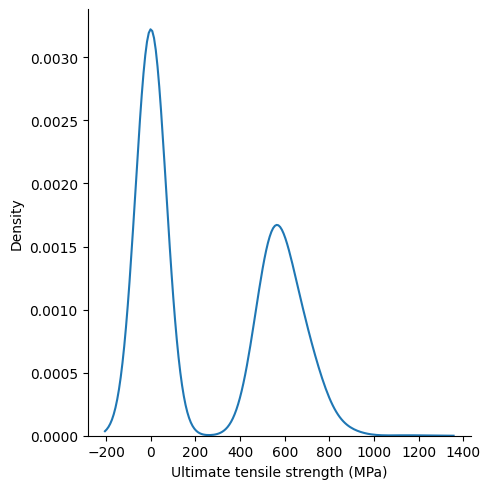

In [24]:
sns.displot(data = data_uts, x = "Ultimate tensile strength (MPa)", kind = "kde")

<Axes: >

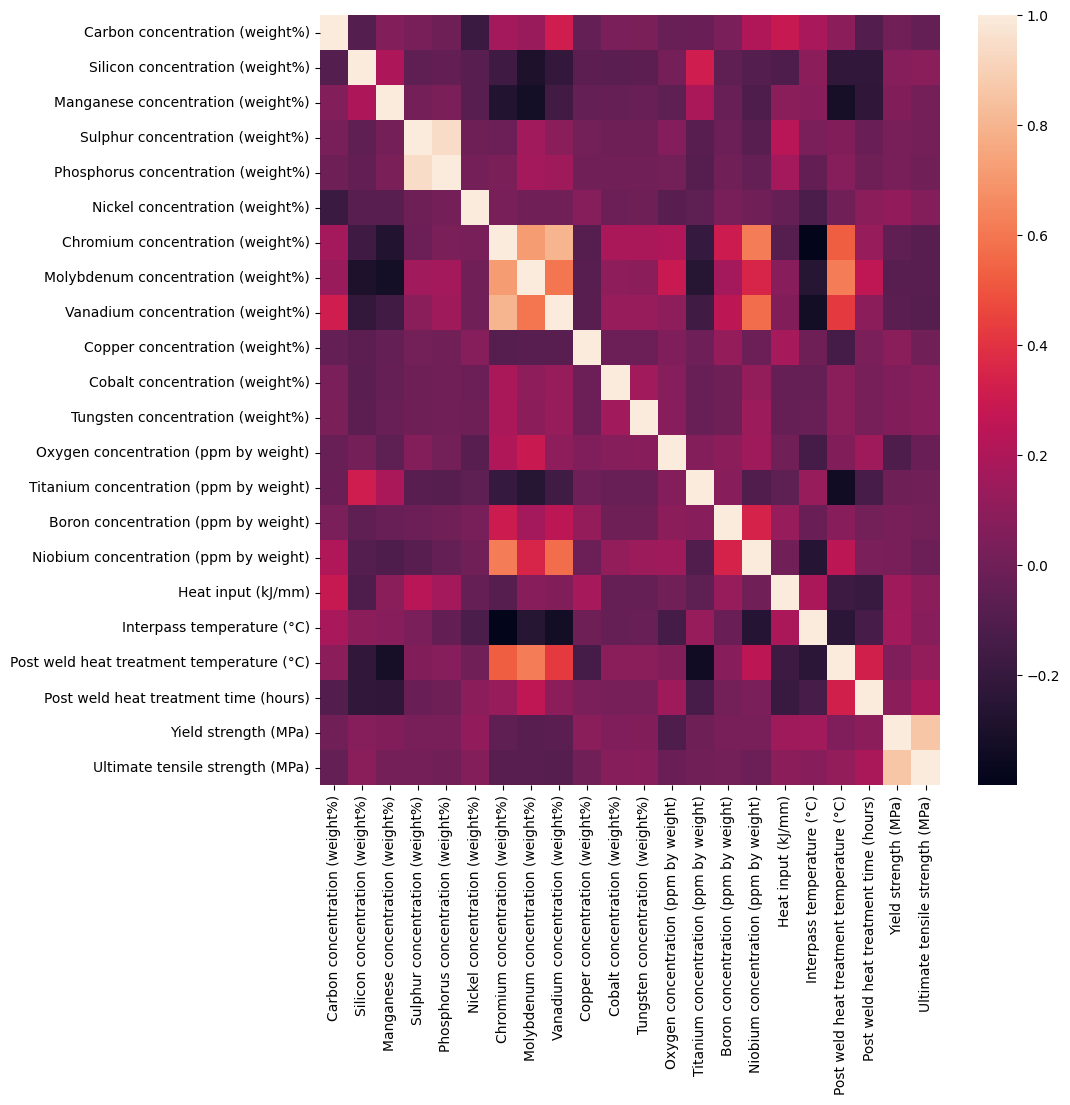

In [25]:
uts_corr = data_uts.corr()
plt.figure(figsize= (10,10))
sns.heatmap(uts_corr)

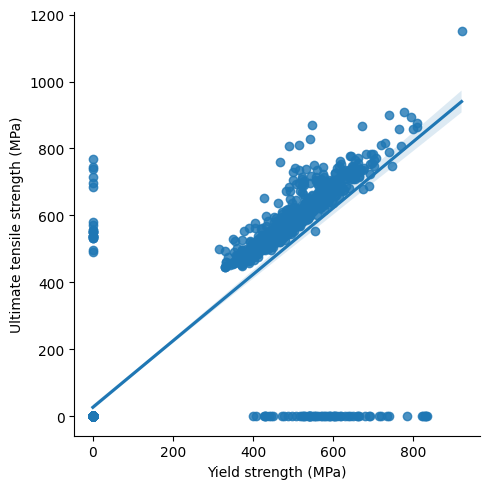

In [26]:
sns.lmplot(data = data_uts, x = "Yield strength (MPa)", y = "Ultimate tensile strength (MPa)")

- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.
- Yield strenght and Ultimate tensile strenght are highly correlated, then we should keep the Yield strenght on the prediction!!

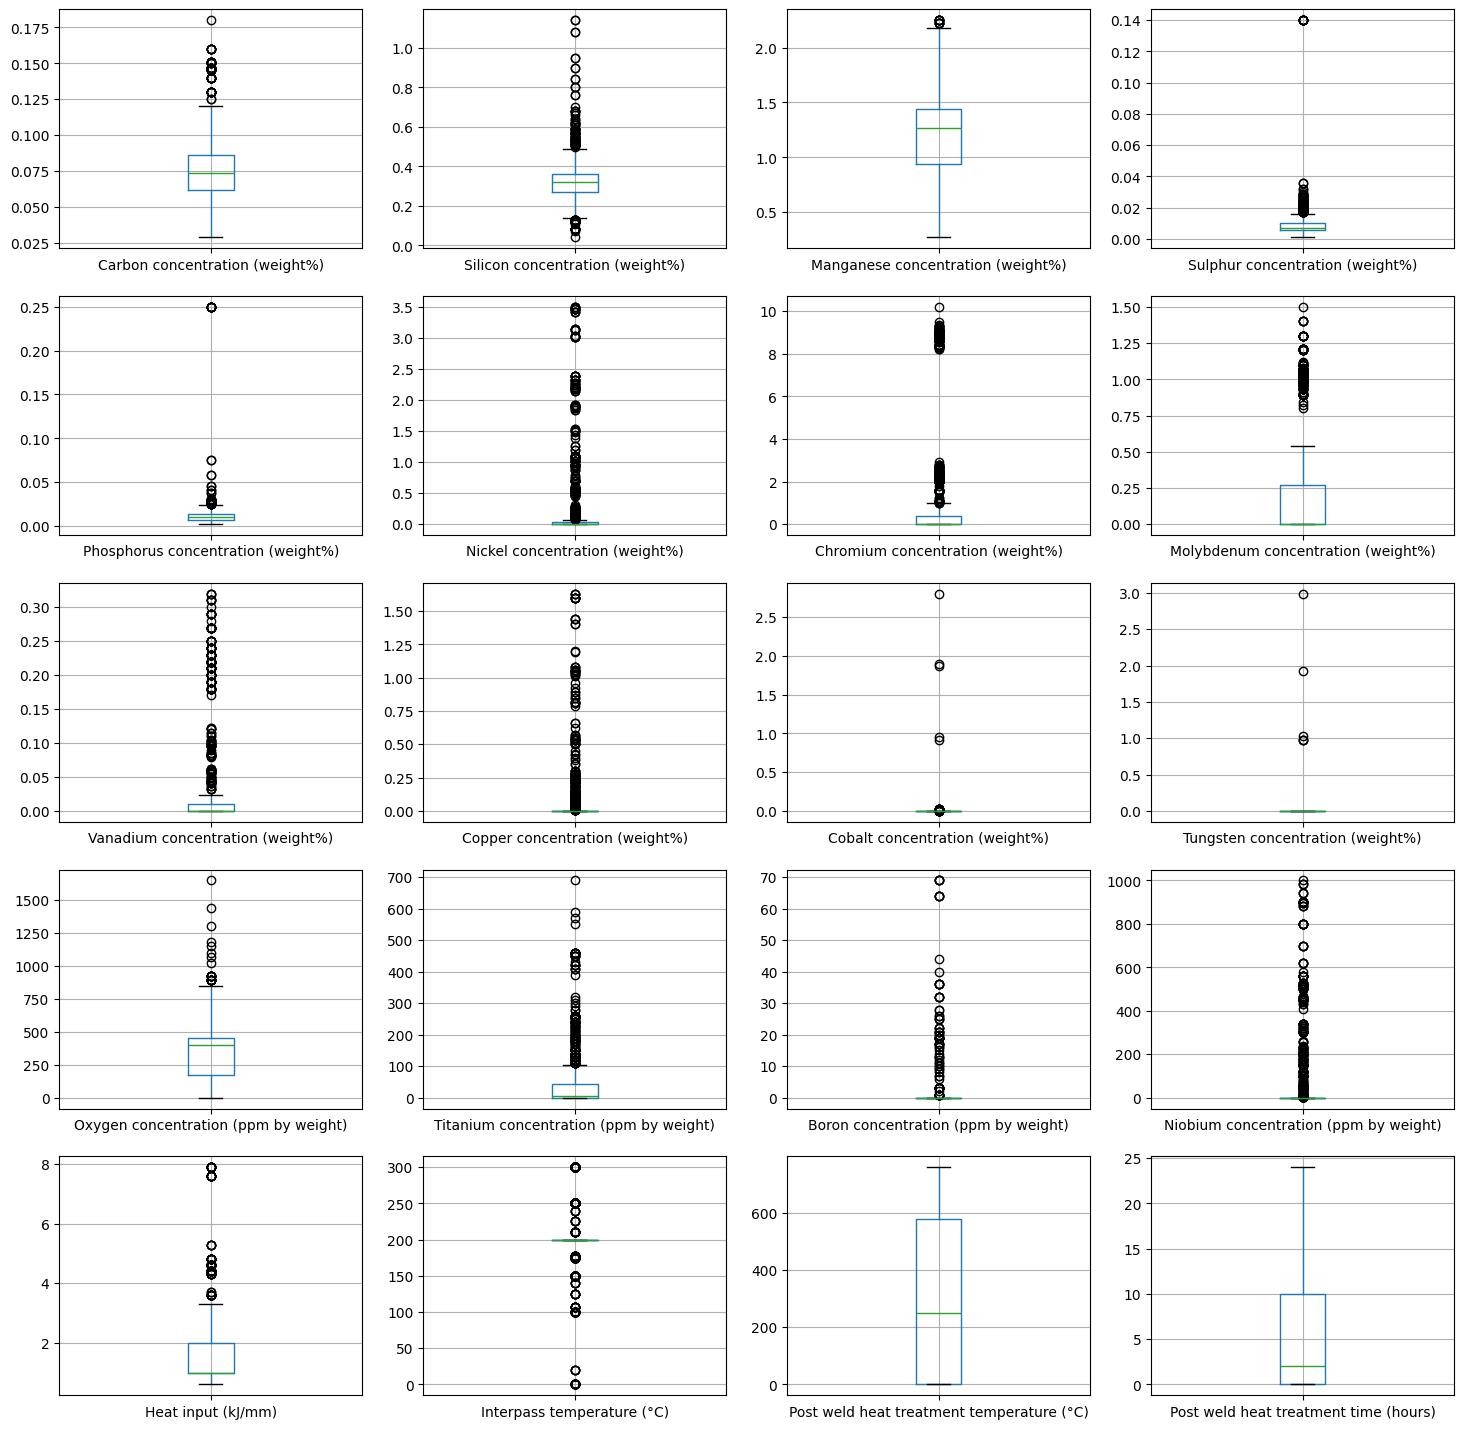

In [31]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_uts.columns):
    data_uts.boxplot(column = col, ax = ax)

## Modeling - Regression

In [33]:
## Split the data into train and test

df_uts = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')

#Selecting only the features indicated in the literature considerably worsens the metrics. Therefore, it is more interesting to do a bivariate analysis later and select the most important features

#df_uts = df_uts[['Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)', 'Sulphur concentration (weight%)','Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)','Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 'Oxygen concentration (ppm by weight)', 'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 'Heat input (kJ/mm)', 'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)', 'Ultimate tensile strength (MPa)']]

X = df_uts.drop(columns = ["Ultimate tensile strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_uts["Ultimate tensile strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

#As the distributions do not follow a Gaussian pattern, we should use normalization instead of standardization. However, to use normalization, we must remove the outliers with IQR

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))


 -------------------- Linear Regression -------------------- 

MAPE LR : 0.8769719678558106
R2 LR : 0.7173994873143337
MSE LR : 21507.581568427864

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 1.0758559951397688
R2 Ridge : 0.7134770535715744
MSE Ridge : 21338.782735928795

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.825912899113609
R2 Lasso : 0.6918433401281384
MSE Lasso : 22673.766180040384

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.8267646547531114
R2 ElasticNet : -2.3864984502366635
MSE ElasticNet : 46157.086538395066

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 6319567219052148.0
R2 Decision Tree : 0.9820198216795512
MSE Decision Tree : 1634.5087903225806

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.11599344687521083
R2 RF : 0.952615582279246
MSE RF : 4028.484347104839

 -------------------- 

# Feature Selection

## Select K-best

### Yield Strenght

In [106]:
## Split the data into train and test

df_yield_strenght = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_yield_strenght = df_yield_strenght.drop_duplicates(keep='last')
df_yield_strenght.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True) #drop negative columns

X = df_yield_strenght.drop(columns = ["Yield strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_yield_strenght["Yield strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Univariate method
select_features = SelectKBest(f_regression, k = 10).fit(X_train, y_train)

X_train_selected = select_features.transform(X_train)
X_test_selected = select_features.transform(X_test)

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train_selected, y_train)
y_pred_lr = lr_pipeline.predict(X_test_selected)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train_selected, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test_selected)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train_selected, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test_selected)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train_selected, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test_selected)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train_selected, y_train)
y_pred_tree = tree_pipeline.predict(X_test_selected)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train_selected, y_train)
y_pred_RF = RF_pipeline.predict(X_test_selected)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train_selected, y_train)
y_pred_gb = gb_pipeline.predict(X_test_selected)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))


 -------------------- Linear Regression -------------------- 

MAPE LR : 0.7054997874311729
R2 LR : 0.7288953118209056
MSE LR : 14878.123676080859

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 0.7043166095480864
R2 Ridge : 0.7250695621153209
MSE Ridge : 14903.044056806031

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.7175684813261286
R2 Lasso : 0.7137781956200218
MSE Lasso : 14969.443456761397

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.8386825541817091
R2 ElasticNet : -3.309905091232234
MSE ElasticNet : 37991.575039853094

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 0.03038692137770551
R2 Decision Tree : 0.9772985724675458
MSE Decision Tree : 1584.8864668911335

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.03817245395055648
R2 RF : 0.9813089760156076
MSE RF : 1272.0069411962556

 ------------------

### Ultimate Tensile Strength

In [107]:
df_uts = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_uts = df_uts.drop_duplicates(keep='last')
df_uts.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True)

X = df_uts.drop(columns = ["Ultimate tensile strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_uts["Ultimate tensile strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Univariate method
select_features = SelectKBest(f_regression, k = 10).fit(X_train, y_train)

X_train_selected = select_features.transform(X_train)
X_test_selected = select_features.transform(X_test)

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")

lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train_selected, y_train)
y_pred_lr = lr_pipeline.predict(X_test_selected)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train_selected, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test_selected)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train_selected, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test_selected)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train_selected, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test_selected)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train_selected, y_train)
y_pred_tree = tree_pipeline.predict(X_test_selected)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train_selected, y_train)
y_pred_RF = RF_pipeline.predict(X_test_selected)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train_selected, y_train)
y_pred_gb = gb_pipeline.predict(X_test_selected)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))



 -------------------- Linear Regression -------------------- 

MAPE LR : 0.7043138724707083
R2 LR : 0.7199368563175775
MSE LR : 20568.37316990786

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 0.7019383102012344
R2 Ridge : 0.7169533867964655
MSE Ridge : 20597.64876848841

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.716858491812338
R2 Lasso : 0.712040627832784
MSE Lasso : 20749.460251839588

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.842821476409075
R2 ElasticNet : -2.667600175050986
MSE ElasticNet : 47051.942692411896

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 3.028784476669976e+16
R2 Decision Tree : 0.8188666350705074
MSE Decision Tree : 16934.621737373738

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.09347812478551307
R2 RF : 0.9037954755564476
MSE RF : 8300.98142055056

 -------------------- Gr

## RFECV

### Yield Strenght

In [111]:
## Split the data into train and test

df_yield_strenght = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_yield_strenght = df_yield_strenght.drop_duplicates(keep='last')
df_yield_strenght.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True) #drop negative columns

X = df_yield_strenght.drop(columns = ["Yield strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_yield_strenght["Yield strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Univariate method

rfecv = RFECV(estimator=RandomForestRegressor(), step=1, cv = 5, scoring="r2") # 5 - fold cross validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['Manganese concentration (weight%)',
       'Phosphorus concentration (weight%)',
       'Vanadium concentration (weight%)',
       'Oxygen concentration (ppm by weight)',
       'Boron concentration (ppm by weight)',
       'Niobium concentration (ppm by weight)',
       'Arsenic concentration (ppm by weight)',
       'Antimony concentration (ppm by weight)', 'Current (A)',
       'Heat input (kJ/mm)', 'Post weld heat treatment temperature (°C)',
       'Post weld heat treatment time (hours)',
       'Ultimate tensile strength (MPa)', 'Elongation (%)',
       'Reduction of Area (%)', 'Charpy impact toughness (J)'],
      dtype='object')


In [122]:
## Split the data into train and test

df_yield_strenght = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_yield_strenght = df_yield_strenght.drop_duplicates(keep='last')

X = df_yield_strenght[[
    'Manganese concentration (weight%)',
    'Phosphorus concentration (weight%)',
    'Vanadium concentration (weight%)',
    'Oxygen concentration (ppm by weight)',
    'Boron concentration (ppm by weight)',
    'Niobium concentration (ppm by weight)',
    'Arsenic concentration (ppm by weight)',
    'Antimony concentration (ppm by weight)', 'Current (A)',
    'Heat input (kJ/mm)', 'Post weld heat treatment temperature (°C)',
    'Post weld heat treatment time (hours)',
    'Ultimate tensile strength (MPa)', 'Elongation (%)',
    'Reduction of Area (%)', 'Charpy impact toughness (J)']]

y = df_yield_strenght["Yield strength (MPa)"]

y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))


 -------------------- Linear Regression -------------------- 

MAPE LR : 0.6932896318918453
R2 LR : 0.7323482498018533
MSE LR : 14681.448278255904

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 0.693514601480207
R2 Ridge : 0.728340655301041
MSE Ridge : 14660.601462664381

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.7071708863503764
R2 Lasso : 0.7144274564109137
MSE Lasso : 14646.920294913889

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.8395259080804884
R2 ElasticNet : -3.3778049058145845
MSE ElasticNet : 38163.74106155266

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 7505999378950827.0
R2 Decision Tree : 0.9606673867897015
MSE Decision Tree : 2825.5602424242425

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.07297425640926591
R2 RF : 0.9793797666539972
MSE RF : 1406.7732128767675

 -------------------- 

Feature ranking:
1. feature 12 (0.384091)
2. feature 14 (0.320784)
3. feature 8 (0.092612)
4. feature 13 (0.088826)
5. feature 2 (0.024557)
6. feature 15 (0.023250)
7. feature 7 (0.020329)
8. feature 4 (0.011735)
9. feature 5 (0.008301)
10. feature 1 (0.006371)
11. feature 3 (0.003996)
12. feature 9 (0.003422)
13. feature 6 (0.003146)
14. feature 0 (0.002945)
15. feature 11 (0.002868)
16. feature 10 (0.002767)


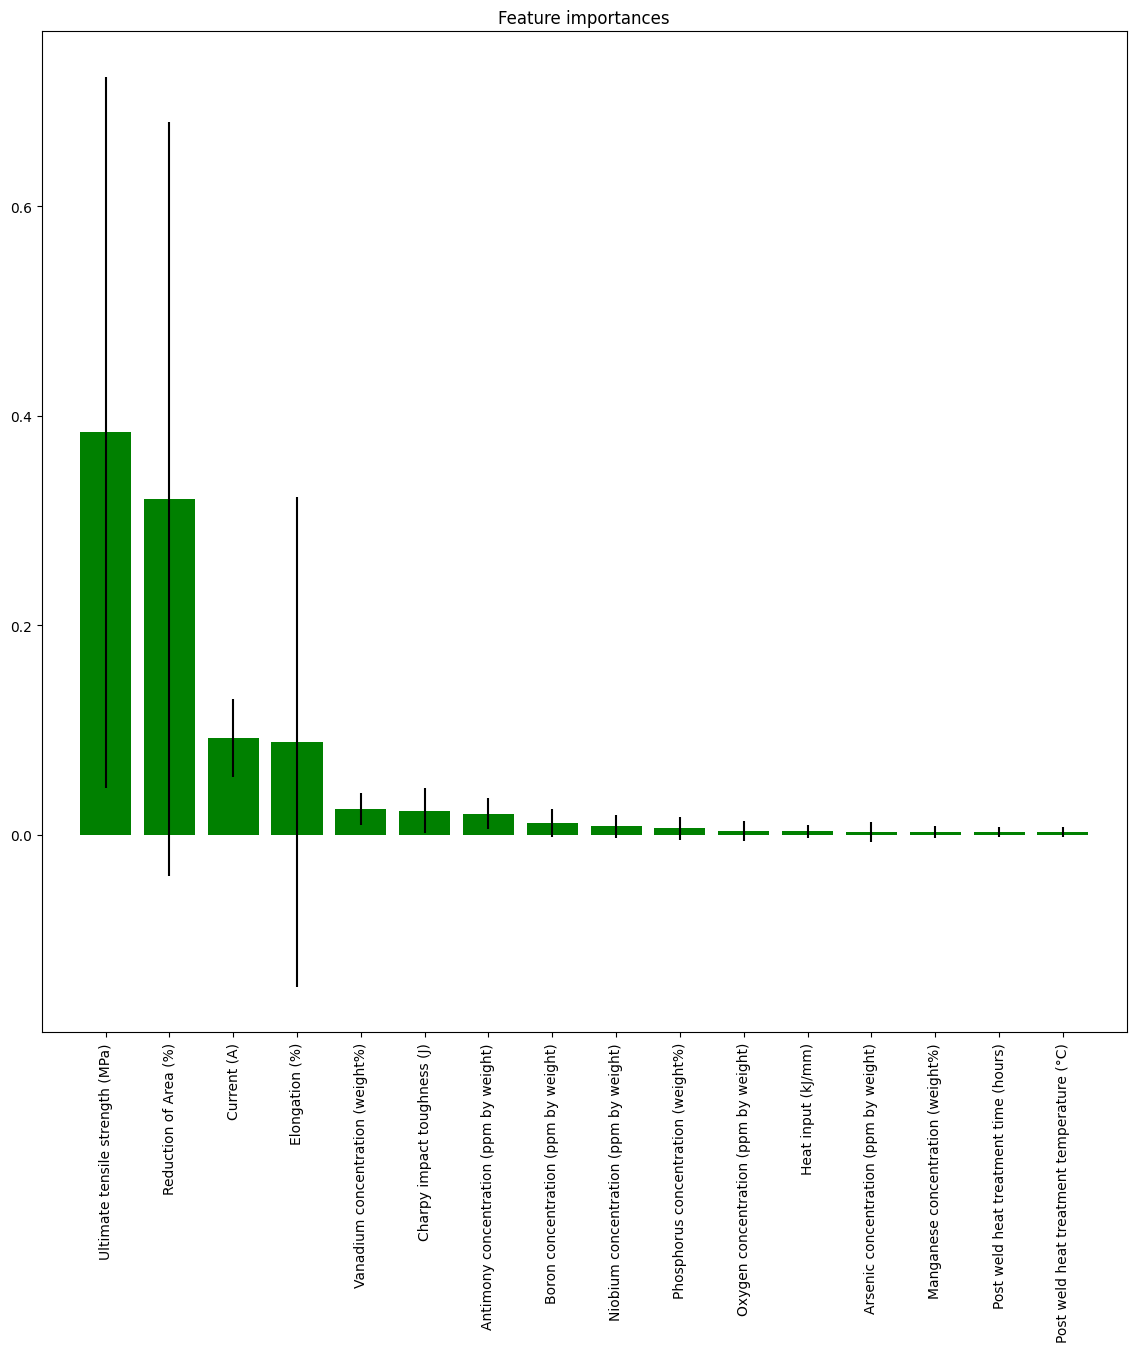

In [123]:
regressor_test = RandomForestRegressor().fit(X_train, y_train)
importances = regressor_test.feature_importances_

std = np.std([tree.feature_importances_ for tree in regressor_test.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Ultimate Tensile Strength

In [119]:
df_uts = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_uts = df_uts.drop_duplicates(keep='last')
df_uts.drop(columns = ["Charpy temperature (°C)", "50% FATT"], inplace = True)

X = df_uts.drop(columns = ["Ultimate tensile strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = df_uts["Ultimate tensile strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Univariate method

rfecv = RFECV(estimator=RandomForestRegressor(), step=1, cv = 5, scoring="r2") # 5 - fold cross validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 36
Best features : Index(['Carbon concentration (weight%)', 'Silicon concentration (weight%)',
       'Manganese concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Oxygen concentration (ppm by weight)',
       'Titanium concentration (ppm by weight)',
       'Nitrogen concentration (ppm by weight)',
       'Aluminium concentration (ppm by weight)',
       'Boron concentration (ppm by weight)',
       'Niobium concentration (ppm by weight)',
       'Tin concentration (ppm by weight)',
       'Arsenic concentration (ppm by weight)',
       'Antimony concentration (ppm by weight)', 'Current (A)', 'Voltage (V)',
       'AC or DC', 'Electrode positive or negative', 'Heat input (kJ/mm)',
       'Interpass temperature (°C)', 'Type of weld',
       'Pos

In [120]:
## Split the data into train and test

df_uts = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')
df_uts = df_uts.drop_duplicates(keep='last')

X = df_uts[
    ['Carbon concentration (weight%)', 'Silicon concentration (weight%)',
    'Manganese concentration (weight%)',
    'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
    'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
    'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
    'Oxygen concentration (ppm by weight)',
    'Titanium concentration (ppm by weight)',
    'Nitrogen concentration (ppm by weight)',
    'Aluminium concentration (ppm by weight)',
    'Boron concentration (ppm by weight)',
    'Niobium concentration (ppm by weight)',
    'Tin concentration (ppm by weight)',
    'Arsenic concentration (ppm by weight)',
    'Antimony concentration (ppm by weight)', 'Current (A)', 'Voltage (V)',
    'AC or DC', 'Electrode positive or negative', 'Heat input (kJ/mm)',
    'Interpass temperature (°C)', 'Type of weld',
    'Post weld heat treatment temperature (°C)',
    'Post weld heat treatment time (hours)', 'Yield strength (MPa)',
    'Elongation (%)', 'Reduction of Area (%)',
    'Charpy impact toughness (J)', 'Hardness (kg/mm2)',
    'Primary ferrite in microstructure (%)',
    'Ferrite with second phase (%)', 'Acicular ferrite (%)',
    'Martensite (%)']]

y = df_uts["Ultimate tensile strength (MPa)"]
y.fillna(0, inplace= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

mean_phosphorus = X_train['Phosphorus concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
X_train['Phosphorus concentration (weight%)'] = X_train['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
X_test['Phosphorus concentration (weight%)'] = X_test['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)

# Replace NaNs with 0 for the other columns
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

## Linear Regression

print("\n -------------------- Linear Regression -------------------- \n")
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))
print("R2 LR :", r2_score(y_pred_lr, y_test))
print("MSE LR :", mean_squared_error(y_pred_lr, y_test))

## Ridge Regression

print("\n -------------------- Ridge Regression -------------------- \n")
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))
print("R2 Ridge :", r2_score(y_pred_ridge, y_test))
print("MSE Ridge :", mean_squared_error(y_pred_ridge, y_test))

## Lasso Regression

print("\n -------------------- Lasso Regression -------------------- \n")
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))
print("R2 Lasso :", r2_score(y_pred_lasso, y_test))
print("MSE Lasso :", mean_squared_error(y_pred_lasso, y_test))

## ElasticNet Regression

print("\n -------------------- ElasticNet Regression -------------------- \n")
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))
print("R2 ElasticNet :", r2_score(y_pred_ElasticNet, y_test))
print("MSE ElasticNet :", mean_squared_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression

print("\n -------------------- Decision Tree Regression -------------------- \n")
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))
print("R2 Decision Tree :", r2_score(y_pred_tree, y_test))
print("MSE Decision Tree :", mean_squared_error(y_pred_tree, y_test))

## Random Forest Regression

print("\n -------------------- Random Forest Regression -------------------- \n")
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))
print("R2 RF :", r2_score(y_pred_RF, y_test))
print("MSE RF :", mean_squared_error(y_pred_RF, y_test))

## Gradient Boosting Regression

print("\n -------------------- Gradient Boosting Regression -------------------- \n")
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))
print("R2 Gradient Boosting :", r2_score(y_pred_gb, y_test))
print("MSE Gradient Boosting :", mean_squared_error(y_pred_gb, y_test))


 -------------------- Linear Regression -------------------- 

MAPE LR : 0.7648699503490968
R2 LR : 0.7579360557079968
MSE LR : 18181.482019410196

 -------------------- Ridge Regression -------------------- 

MAPE Ridge : 0.8309947144865215
R2 Ridge : 0.751353590043009
MSE Ridge : 18432.007378458737

 -------------------- Lasso Regression -------------------- 

MAPE Lasso : 0.7197874221965678
R2 Lasso : 0.7244067945737247
MSE Lasso : 19994.441245778606

 -------------------- ElasticNet Regression -------------------- 

MAPE ElasticNet : 0.8419145982277053
R2 ElasticNet : -2.642453059478366
MSE ElasticNet : 46939.46007212178

 -------------------- Decision Tree Regression -------------------- 

MAPE Decision Tree : 6778144893719231.0
R2 Decision Tree : 0.9748465863783162
MSE Decision Tree : 2308.383313131313

 -------------------- Random Forest Regression -------------------- 

MAPE RF: 0.10271099677820053
R2 RF : 0.9650251398879056
MSE RF : 2999.3729225292927

 -------------------- G

Feature ranking:
1. feature 27 (0.561204)
2. feature 29 (0.197088)
3. feature 28 (0.062376)
4. feature 15 (0.021602)
5. feature 10 (0.017635)
6. feature 26 (0.015541)
7. feature 30 (0.015395)
8. feature 5 (0.011933)
9. feature 22 (0.010807)
10. feature 23 (0.010472)
11. feature 13 (0.010399)
12. feature 25 (0.009861)
13. feature 3 (0.008221)
14. feature 12 (0.008145)
15. feature 1 (0.006621)
16. feature 6 (0.005042)
17. feature 18 (0.004878)
18. feature 11 (0.004574)
19. feature 4 (0.004382)
20. feature 0 (0.003350)
21. feature 2 (0.002644)
22. feature 14 (0.002411)
23. feature 9 (0.001715)
24. feature 31 (0.001656)
25. feature 19 (0.001541)
26. feature 17 (0.000347)
27. feature 16 (0.000147)
28. feature 7 (0.000012)
29. feature 8 (0.000000)
30. feature 34 (0.000000)
31. feature 20 (0.000000)
32. feature 21 (0.000000)
33. feature 24 (0.000000)
34. feature 32 (0.000000)
35. feature 33 (0.000000)
36. feature 35 (0.000000)


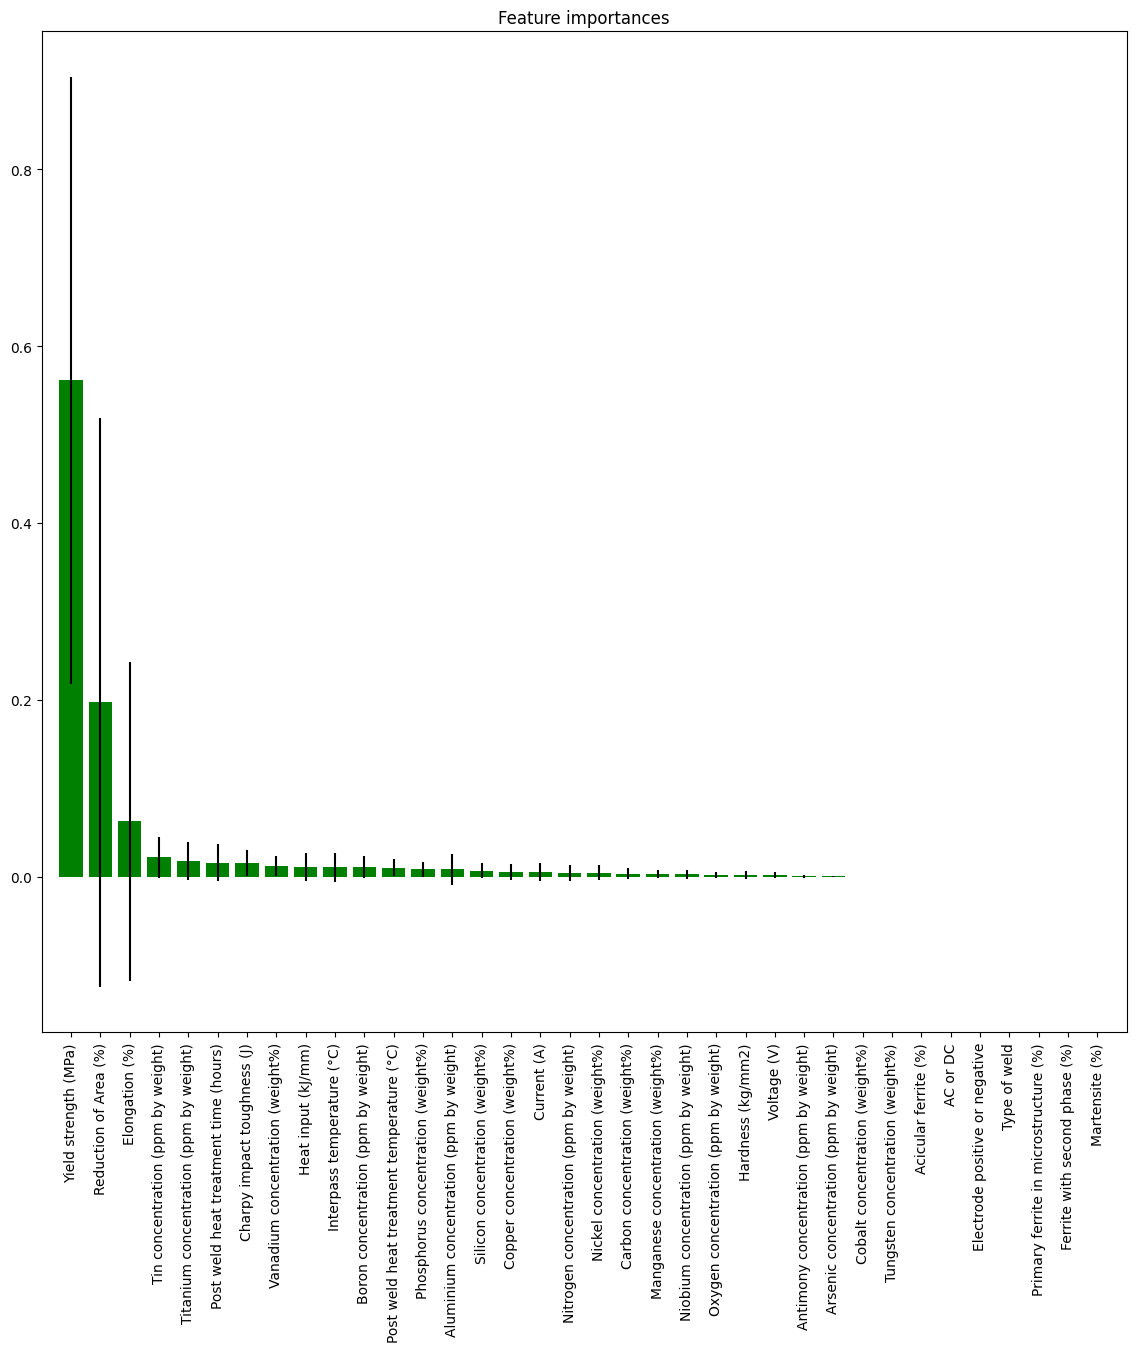

In [121]:
regressor_test = RandomForestRegressor().fit(X_train, y_train)
importances = regressor_test.feature_importances_

std = np.std([tree.feature_importances_ for tree in regressor_test.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()